# Credit Risk Evaluator

In [21]:
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:95% !important; }</style>"))

In [22]:
# Data Science Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Model Preprocessing & Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [23]:
# Import the data
main_df = pd.read_csv("Resources/lending_data.csv")
main_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [24]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [25]:
main_df. isnull().sum() 

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

In [63]:
main_df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [26]:
main_df.num_of_accounts.value_counts()

4     24669
3     24339
5     10973
2     10394
6      2046
1      1908
12      817
11      684
13      559
10      398
14      222
7       169
9       137
0       130
8        43
15       41
16        7
Name: num_of_accounts, dtype: int64

In [27]:
main_df.derogatory_marks.value_counts()

0    50497
1    24174
2     2351
3      514
Name: derogatory_marks, dtype: int64

In [28]:
main_df.loan_status.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [29]:
main_df.drop("loan_status", axis=1).apply(lambda x: x.corr(main_df.loan_status)).sort_values(ascending=False)

interest_rate       0.758900
borrower_income     0.758890
total_debt          0.758890
loan_size           0.758846
num_of_accounts     0.749802
debt_to_income      0.589305
derogatory_marks    0.553187
dtype: float64

                  loan_size  interest_rate  borrower_income  debt_to_income  \
loan_size          1.000000       0.999905         0.999893        0.951847   
interest_rate      0.999905       1.000000         0.999994        0.951938   
borrower_income    0.999893       0.999994         1.000000        0.951950   
debt_to_income     0.951847       0.951938         0.951950        1.000000   
num_of_accounts    0.988507       0.988515         0.988509        0.941078   
derogatory_marks   0.840407       0.840596         0.840577        0.825668   
total_debt         0.999893       0.999994         1.000000        0.951950   
loan_status        0.758846       0.758900         0.758890        0.589305   

                  num_of_accounts  derogatory_marks  total_debt  loan_status  
loan_size                0.988507          0.840407    0.999893     0.758846  
interest_rate            0.988515          0.840596    0.999994     0.758900  
borrower_income          0.988509          0.840577

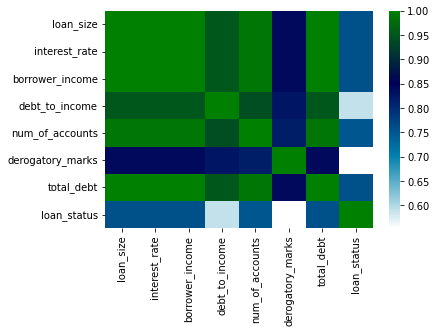

In [67]:
# check correlation and collinearity between features
corrs = main_df.corr()
print(corrs)
print()
sns.heatmap(corrs, cmap='ocean_r')
plt.show()

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

I predict that the Logistic Regression because its a classification algorithm based on a linear model. Based on my findings, linear models are generally more resource efficent, making them the ideal under equal conditions. However, Logistic Regressions yield a discrete value suitable for rendering classification outcomes.

## Split the Data into Training and Testing Sets

In [31]:
# Split the data into X_train, X_test, y_train, y_test
X = main_df.drop("loan_status", axis=1).values
y = main_df.loc[:, ["loan_status"]].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.7 : 0.3


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]

[[9.99483475e-01 5.16525384e-04]
 [9.99081117e-01 9.18883479e-04]
 [9.99285141e-01 7.14859332e-04]
 [9.98727121e-01 1.27287947e-03]
 [9.99869988e-01 1.30012242e-04]
 [9.98558507e-01 1.44149304e-03]
 [9.96870047e-01 3.12995260e-03]
 [9.99937180e-01 6.28202391e-05]
 [6.83891922e-02 9.31610808e-01]
 [9.97235616e-01 2.76438418e-03]
 [9.99104090e-01 8.95910148e-04]
 [9.99856274e-01 1.43726400e-04]
 [9.98521564e-01 1.47843583e-03]
 [9.99577769e-01 4.22231363e-04]
 [9.99876280e-01 1.23720216e-04]]


Results for the training set:
**********************************
[[52247   278]
 [  184  1566]]

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     52525
           1       0.85      0.89      0.87      1750

    accuracy                           0.99     54275
   macro avg       0.92      0.94      0.93     54275
weighted avg       0.99      0.99      0.99     54275




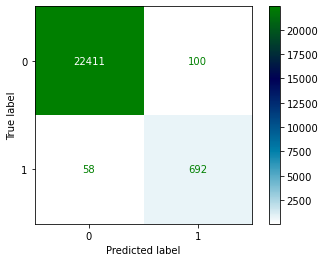


Results for the test set:
**********************************
[[22411   100]
 [   58   692]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.92      0.90       750

    accuracy                           0.99     23261
   macro avg       0.94      0.96      0.95     23261
weighted avg       0.99      0.99      0.99     23261


AUC for the Model Test Set: 0.9968795107577036


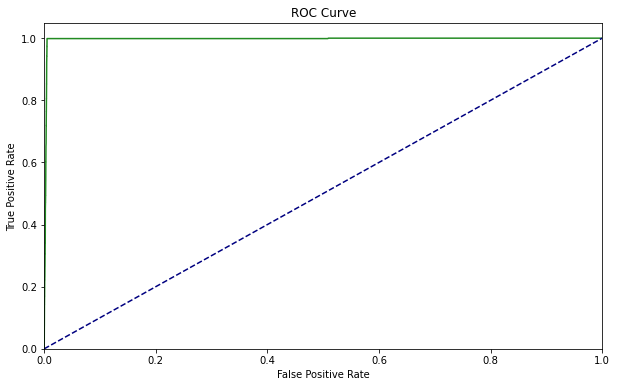

Brier Score:
132.4073574644918


In [59]:
# Train a Logistic Regression model and print the model score
lr = LogisticRegression(max_iter=10000) # init
lr.fit(X_train, y_train) # fit

train_preds = lr.predict(X_train) # predict
test_preds = lr.predict(X_test)
test_proba = lr.predict_proba(X_test)

print(test_preds[0:15]) #print pred & probability result array 
print()
print(test_proba[0:15])
print()

combined_results = f"""
Results for the training set:
**********************************
{confusion_matrix(y_train, train_preds)}

{classification_report(y_train, train_preds)}
"""
print(combined_results)

# plot matrix for test set 
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='ocean_r')
plt.show()

#################################################

combined_results = f"""
Results for the test set:
**********************************
{confusion_matrix(y_test, test_preds)}

{classification_report(y_test, test_preds)}
"""
print(combined_results)

#################################################

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='forestgreen')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("Brier Score:")
print(sum((y_test - test_proba[:,1])**2))

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]

[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.02333333 0.97666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]


Results for the training set:
**********************************
[[52408   117]
 [   31  1719]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52525
           1       0.94      0.98      0.96      1750

    accuracy                           1.00     54275
   macro avg       0.97      0.99      0.98     54275
weighted avg       1.00      1.00      1.00     54275




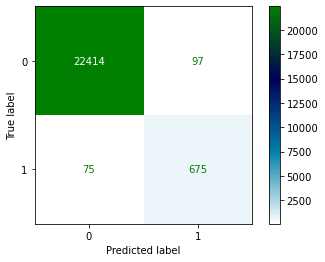


Results for the test set:
**********************************
[[22414    97]
 [   75   675]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.90      0.89       750

    accuracy                           0.99     23261
   macro avg       0.94      0.95      0.94     23261
weighted avg       0.99      0.99      0.99     23261


AUC for the Model Test Set: 0.9969116431966595


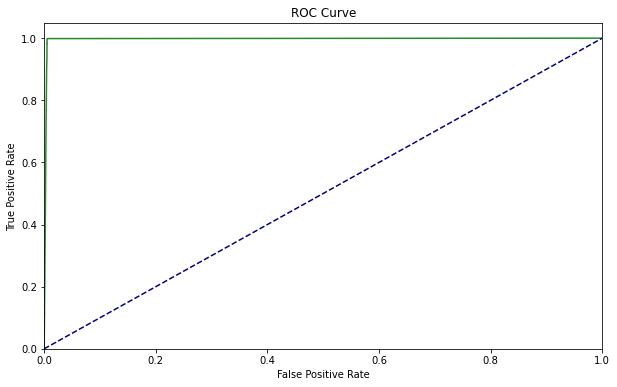

Brier Score:
136.2111588318767


In [62]:
# Train a Random Forest Classifier model and print the model score
rf = RandomForestClassifier() # init
rf.fit(X_train, y_train) # fit

train_preds = rf.predict(X_train) # predict
test_preds = rf.predict(X_test)
test_proba = rf.predict_proba(X_test)

print(test_preds[0:15]) #print pred & probability result array 
print()
print(test_proba[0:15])
print()

combined_results = f"""
Results for the training set:
**********************************
{confusion_matrix(y_train, train_preds)}

{classification_report(y_train, train_preds)}
"""
print(combined_results)


# make plot
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='ocean_r')
plt.show()

#################################################

combined_results = f"""
Results for the test set:
**********************************
{confusion_matrix(y_test, test_preds)}

{classification_report(y_test, test_preds)}
"""
print(combined_results)

###################################################

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='forestgreen')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("Brier Score:")
print(sum((y_test - test_proba[:,1])**2))

*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

Both models performed nearly the same overall. First, there wasn't an indication of "overfitting" between the train and test sets for either model - that's a plus. Next, the precision, recall, f-1 score, and accuracy was very close for both models. Additionally the ROC curve is basically the same with differences of less than .0001. In terms of the Brier Score, lower is better. However, 136.211 versus 132.407 is insignificant as well. Depsite the imbalance seen when running loan_status.valuecounts in cell 28, the Logistic regression predicted targeted "1" credit risk at 692/750, yielding a 92% recall while the RandomForest model predicted 675/750 at a 90% recall on the test sample set. Lastly, the fact that none of the features showed high variance, a Logistic Regression was just as well suited for this dataset as a RandomForest model.